In [144]:
# import the libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import plotly.express as px
import plotly.graph_objects as go
import pycountry
import geopandas
warnings.filterwarnings('ignore')
%matplotlib inline

## Data until 2017

In [145]:
# Import the data and visualize the first rows
df = pd.read_csv('Outbreak_240817.csv')
df

,Id,source,latitude,longitude,region,country,admin1,localityName,localityQuality,observationDate,...,speciesDescription,sumAtRisk,sumCases,sumDeaths,sumDestroyed,sumSlaughtered,humansGenderDesc,humansAge,humansAffected,humansDeaths
0,230399,OIE,-27.900000,30.800000,Africa,South Africa,KwaZulu-Natal,HPAI_H5N8_2017_019,Exact,17/08/2017,...,"domestic, unspecified bird",248000.0,12.0,12.0,50000.0,0.0,NaN,0.0,NaN,NaN
1,230381,OIE,54.837037,73.354155,Europe,Russian Federation,Omskaya Oblast,Novaya Stanica,Exact,16/08/2017,...,"domestic, swine",122.0,6.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN
2,230333,OIE,-21.077740,30.211620,Africa,Zimbabwe,Masvingo,Mwambe,Exact,16/08/2017,...,"domestic, cattle",1283.0,112.0,0.0,NaN,7.0,NaN,NaN,NaN,NaN
3,230396,OIE,-26.000000,28.300000,Africa,South Africa,Gauteng,HPAI_H5N8_2017_020,Exact,15/08/2017,...,"wild, unspecified bird",NaN,1.0,1.0,0.0,0.0,NaN,0.0,NaN,NaN
4,230371,OIE,49.237900,17.700200,Europe,Czech Republic,Jihomoravsky,Hvozdná,Exact,15/08/2017,...,"wild, wild boar",NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17003,207420,FAO-Report,7.289176,8.857676,Africa,Nigeria,Benue,Benue,Centroid Admin1,01/06/1998,...,"domestic, swine",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17004,207421,FAO officer,15.112823,-23.645005,Africa,Cape Verde,Santiago,Santiago,Centroid Admin1,01/01/1998,...,"domestic, swine",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17005,207417,FAO-Report,6.658696,2.489576,Africa,Benin,Oueme,Oueme,Centroid Admin1,01/12/1997,...,"domestic, swine",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17006,207418,FAO-Report,7.143645,3.278189,Africa,Nigeria,Ogun,Ogun,Centroid Admin1,01/09/1997,...,"domestic, swine",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
# Visualize columns
df.columns

Index(['Id', 'source', 'latitude', 'longitude', 'region', 'country', 'admin1',
       'localityName', 'localityQuality', 'observationDate', 'reportingDate',
       'status', 'disease', 'serotypes', 'speciesDescription', 'sumAtRisk',
       'sumCases', 'sumDeaths', 'sumDestroyed', 'sumSlaughtered',
       'humansGenderDesc', 'humansAge', 'humansAffected', 'humansDeaths'],
      dtype='object')

In [147]:
# Drop columns that are less important
df.drop(['Id', 'source','observationDate', 'speciesDescription', 'serotypes', 'admin1','reportingDate', 'localityQuality','humansGenderDesc', 'humansAge'], axis=1, inplace=True)
df.columns

Index(['latitude', 'longitude', 'region', 'country', 'localityName', 'status',
       'disease', 'sumAtRisk', 'sumCases', 'sumDeaths', 'sumDestroyed',
       'sumSlaughtered', 'humansAffected', 'humansDeaths'],
      dtype='object')

In [148]:
# Check if there are missing values
df.isna().sum()

latitude              0
longitude             0
region                0
country               0
localityName          0
status                0
disease               0
sumAtRisk          7251
sumCases           2473
sumDeaths          2840
sumDestroyed       4003
sumSlaughtered     4773
humansAffected    15591
humansDeaths      16557
dtype: int64

In [149]:
# Fill in the gaps with '0' and check for missing values
df = df.fillna(0)
df.isna().sum()

latitude          0
longitude         0
region            0
country           0
localityName      0
status            0
disease           0
sumAtRisk         0
sumCases          0
sumDeaths         0
sumDestroyed      0
sumSlaughtered    0
humansAffected    0
humansDeaths      0
dtype: int64

In [150]:
# create a bar chart with the countries with the most events
def most_slaughters(df):
    
    # definir países como índice
    df_most = df.set_index("country")
    
    # conterá os gráficos a serem exibidos
    item_list = []
    
    # inverter a lista para ter 2017 primeiro
    for col in df_most.columns.tolist()[::-1]:
        # ordenar df
        df_int = df_most.sort_values(col, ascending=False).head(10)
        # criar o gráfico
        item = dict(args=[{"x" : [df_int.index], "y" : [df_int[col]] }, # set x and y axis
                         {"title" : "Countries with the most " + col} # set title
                         ],
                         label=col, method="update") #label = name of the button
                                                     #method="update" will modify data and layout
        item_list.append(item)
    
    # crie o primeiro gráfico para que corresponda ao primeiro valor do nosso menu
    firstviz = df_most.sort_values(df_most.columns.tolist()[::-1][0], ascending=False).head(10)
    
    fig = px.bar(firstviz, x=firstviz.index, y=firstviz.columns.tolist()[::-1][0],
                 color_discrete_sequence=["#020202"],
                 text_auto=True,
                 title="Countries with the most " + df_most.columns.tolist()[::-1][0])
    # título centralizado
    fig.update_layout(title_x=0.5)

    # criar menu
    fig.update_layout(
            updatemenus=[
                # lista de itens = lista dos gráficos !
                dict(buttons=list(item_list),  

                 # lugar do menu suspenso
                direction="down",showactive=True,x=0.005,
                xanchor="left",y=1.4,yanchor="top") ] )
    
    return fig.show()

In [152]:
# Dynamic bar chart
most_slaughters(df)

In [153]:
# Group the data by country and sum the values
df_sum = df.groupby('country')['sumSlaughtered'].sum()
df_sum

country
Albania       0.0
Algeria      12.0
Angola        0.0
Argentina     0.0
Armenia       0.0
             ... 
Uruguay       0.0
Viet Nam      0.0
West Bank     0.0
Zambia        0.0
Zimbabwe     49.0
Name: sumSlaughtered, Length: 122, dtype: float64

In [154]:
type(df_sum)

pandas.core.series.Series

In [155]:
df0 = df_sum.to_frame()

In [156]:
df0

,sumSlaughtered
country,
Albania,0.0
Algeria,12.0
Angola,0.0
Argentina,0.0
Armenia,0.0
...,...
Uruguay,0.0
Viet Nam,0.0
West Bank,0.0


In [157]:
# Drop rows where sumSlaughtered has a value of 0
df0.drop(df0[df0['sumSlaughtered'] == 0].index, inplace=True)

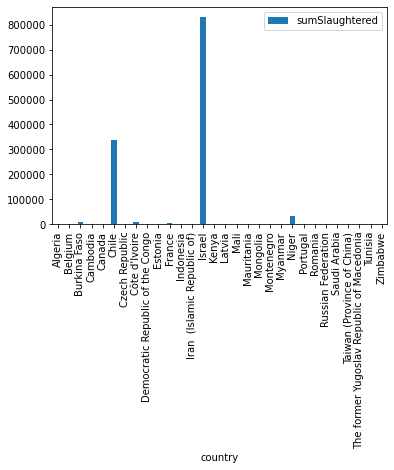

In [158]:
df0.plot(kind='bar');

## Data from 2021 to 2022

In [199]:
# IImport the data and visualize the first rows
df1 = pd.read_csv('influenza_data_0121_1222.csv')
df1.head()

,WHOREGION,ITZ,COUNTRY/AREA/TERRITORY,COUNTRY_CODE,ORIGIN_SOURCE,ISO_YEAR,ISO_WEEK,ISO_SDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,...,AH5,ANOTSUBTYPED,INF_A,BVIC,BYAM,BNOTDETERMINED,INF_B,INF_ALL,INF_NEGATIVE,ILI_ACTIVITY
0,WPR,FLU_OCE_MEL_POL,Australia,AUS,NOTDEFINED,2021,39,2021-09-27T03:00:00.000Z,1757.0,2694.0,...,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,2694.0,2
1,WPR,FLU_OCE_MEL_POL,Australia,AUS,NOTDEFINED,2021,40,2021-10-04T03:00:00.000Z,1924.0,2753.0,...,NaN,0.0,0.0,NaN,NaN,1.0,1.0,1.0,2752.0,2
2,WPR,FLU_OCE_MEL_POL,Australia,AUS,NOTDEFINED,2021,41,2021-10-11T03:00:00.000Z,1668.0,2462.0,...,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,2462.0,2
3,WPR,FLU_OCE_MEL_POL,Australia,AUS,NOTDEFINED,2021,42,2021-10-18T03:00:00.000Z,1772.0,2468.0,...,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,2468.0,2
4,WPR,FLU_OCE_MEL_POL,Australia,AUS,NOTDEFINED,2021,43,2021-10-25T03:00:00.000Z,1700.0,2369.0,...,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,2368.0,2


In [200]:
# Visualize columns
df1.columns

Index(['WHOREGION', 'ITZ', 'COUNTRY/AREA/TERRITORY', 'COUNTRY_CODE',
       'ORIGIN_SOURCE', 'ISO_YEAR', 'ISO_WEEK', 'ISO_SDATE',
       'SPEC_RECEIVED_NB', 'SPEC_PROCESSED_NB', 'AH1', 'AH1N12009', 'AH3',
       'AH5', 'ANOTSUBTYPED', 'INF_A', 'BVIC', 'BYAM', 'BNOTDETERMINED',
       'INF_B', 'INF_ALL', 'INF_NEGATIVE', 'ILI_ACTIVITY'],
      dtype='object')

In [201]:
# Drop columns that are less important
df1.drop(['WHOREGION', 'ITZ', 'ORIGIN_SOURCE','COUNTRY_CODE','ISO_WEEK', 'ISO_SDATE','SPEC_RECEIVED_NB', 'SPEC_PROCESSED_NB', 'ILI_ACTIVITY'], axis=1, inplace=True)
df1.columns

Index(['COUNTRY/AREA/TERRITORY', 'ISO_YEAR', 'AH1', 'AH1N12009', 'AH3', 'AH5',
       'ANOTSUBTYPED', 'INF_A', 'BVIC', 'BYAM', 'BNOTDETERMINED', 'INF_B',
       'INF_ALL', 'INF_NEGATIVE'],
      dtype='object')

In [202]:
# Check if there are missing values
df1.isna().sum()

COUNTRY/AREA/TERRITORY      0
ISO_YEAR                    0
AH1                       616
AH1N12009                 124
AH3                        45
AH5                       350
ANOTSUBTYPED              239
INF_A                      20
BVIC                      166
BYAM                      224
BNOTDETERMINED            196
INF_B                      41
INF_ALL                    10
INF_NEGATIVE              285
dtype: int64

In [203]:
# Fill in the gaps with '0' and check for missing values
df1 = df1.fillna(0)
df1.isna().sum()

COUNTRY/AREA/TERRITORY    0
ISO_YEAR                  0
AH1                       0
AH1N12009                 0
AH3                       0
AH5                       0
ANOTSUBTYPED              0
INF_A                     0
BVIC                      0
BYAM                      0
BNOTDETERMINED            0
INF_B                     0
INF_ALL                   0
INF_NEGATIVE              0
dtype: int64

In [204]:
# create a bar chart with the countries with the most events
def influenza_cases_2122(df):
    
    # definir países como índice
    df1_most = df1.set_index("COUNTRY/AREA/TERRITORY")
    
    # conterá os gráficos a serem exibidos
    item_list = []
    
    # inverter a lista para ter 2017 primeiro
    for col in df1_most.columns.tolist()[::-1]:
        # ordenar df
        df1_int = df1_most.sort_values(col, ascending=False).head(10)
        # criar o gráfico
        item = dict(args=[{"x" : [df1_int.index], "y" : [df1_int[col]] }, # set x and y axis
                         {"title" : "Countries with the most " + col} # set title
                         ],
                         label=col, method="update") #label = name of the button
                                                     #method="update" will modify data and layout
        item_list.append(item)
    
    # crie o primeiro gráfico para que corresponda ao primeiro valor do nosso menu
    firstviz = df1_most.sort_values(df1_most.columns.tolist()[::-1][0], ascending=False).head(10)
    
    fig = px.bar(firstviz, x=firstviz.index, y=firstviz.columns.tolist()[::-1][0],
                 color_discrete_sequence=["#020202"],
                 text_auto=True,
                 title="Countries with the most " + df1_most.columns.tolist()[::-1][0])
    # título centralizado
    fig.update_layout(title_x=0.5)

    # criar menu
    fig.update_layout(
            updatemenus=[
                # lista de itens = lista dos gráficos !
                dict(buttons=list(item_list),  

                 # lugar do menu suspenso
                direction="down",showactive=True,x=0.005,
                xanchor="left",y=1.4,yanchor="top") ] )
    
    return fig.show()

In [192]:
influenza_cases_2122(df1)

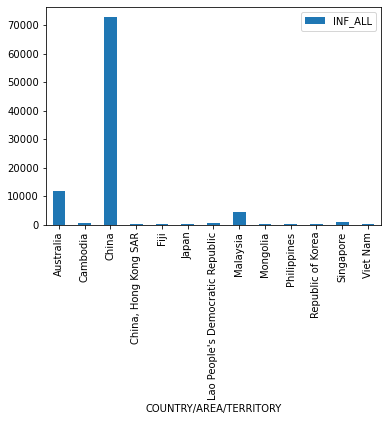

In [227]:
# Group the data by country and sum the values
df1_sum = df1.groupby('COUNTRY/AREA/TERRITORY')['INF_ALL'].sum()

# Convert pandas core series to pandas dataframe
df01 = df1_sum.to_frame()

# Drop rows where INF_ALL has a value of 0
df01.drop(df01[df01['INF_ALL'] == 0].index, inplace=True)
df01.plot(kind='bar');

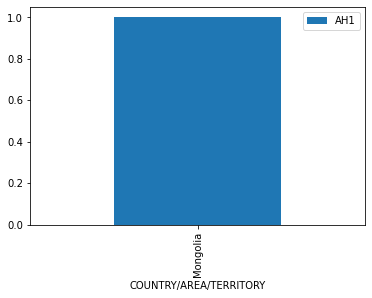

In [228]:
# Group the data by country and sum the values oh AH1
df2_sum = df1.groupby('COUNTRY/AREA/TERRITORY')['AH1'].sum()
df2_sum

# Convert pandas core series to pandas dataframe
df02 = df2_sum.to_frame()

# Drop rows where AH1 has a value of 0
df02.drop(df02[df02['AH1'] == 0].index, inplace=True)
df02.plot(kind='bar');

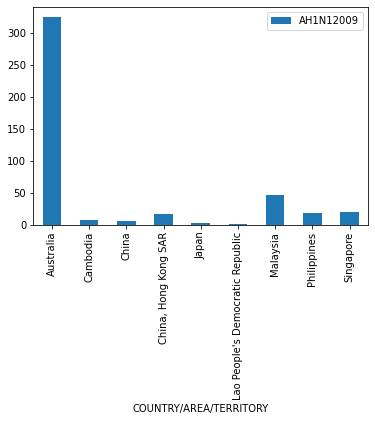

In [229]:
# Group the data by country and sum the values oh AH1N12009
df3_sum = df1.groupby('COUNTRY/AREA/TERRITORY')['AH1N12009'].sum()
df3_sum

# Convert pandas core series to pandas dataframe
df03 = df3_sum.to_frame()

# Drop rows where AH1N12009 has a value of 0
df03.drop(df03[df03['AH1N12009'] == 0].index, inplace=True)
df03.plot(kind='bar');

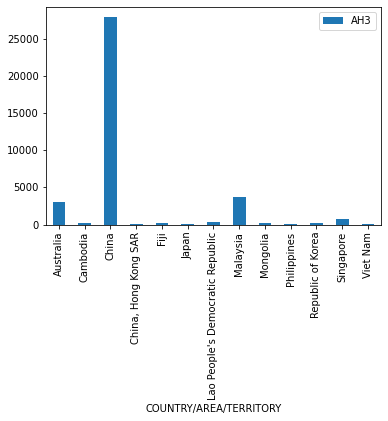

In [230]:
# Group the data by country and sum the values of AH3
df4_sum = df1.groupby('COUNTRY/AREA/TERRITORY')['AH3'].sum()
df4_sum

# Convert pandas core series to pandas dataframe
df4 = df4_sum.to_frame()

# Drop rows where AH3 has a value of 0
df4.drop(df4[df4['AH3'] == 0].index, inplace=True)
df4.plot(kind='bar');

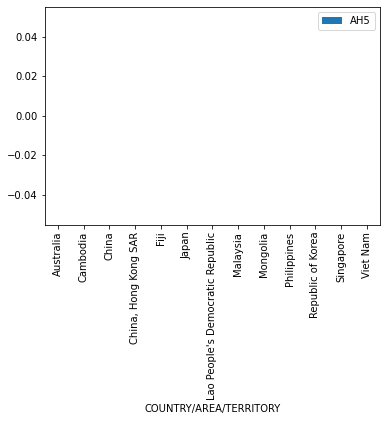

In [218]:
# Group the data by country and sum the values of AH5
df5_sum = df1.groupby('COUNTRY/AREA/TERRITORY')['AH5'].sum()
df5_sum

# Convert pandas core series to pandas dataframe
df5 = df5_sum.to_frame()

# Drop rows where AH5 has a value of 0
#df5.drop(df5[df5['AH5'] == 0].index, inplace=True)
df5.plot(kind='bar');

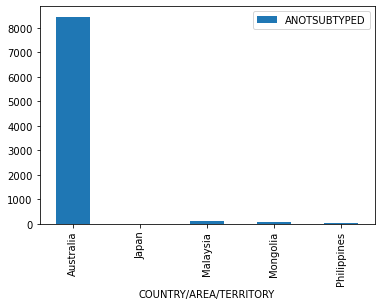

In [231]:
# Group the data by country and sum the values of ANOTSUBTYPED
df6_sum = df1.groupby('COUNTRY/AREA/TERRITORY')['ANOTSUBTYPED'].sum()
df6_sum

# Convert pandas core series to pandas dataframe
df06 = df6_sum.to_frame()

# Drop rows where ANOTSUBTYPED has a value of 0
df06.drop(df06[df06['ANOTSUBTYPED'] == 0].index, inplace=True)
df06.plot(kind='bar');

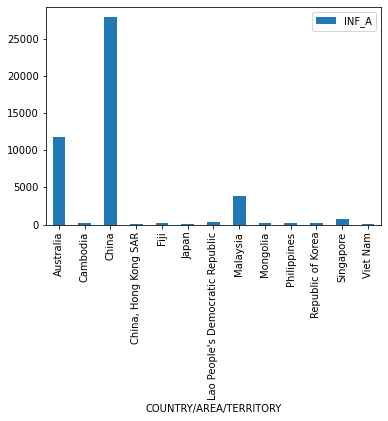

In [220]:
# Group the data by country and sum the values of INF_A
df7_sum = df1.groupby('COUNTRY/AREA/TERRITORY')['INF_A'].sum()
df7_sum

# Convert pandas core series to pandas dataframe
df07 = df7_sum.to_frame()

# Drop rows where INF_A has a value of 0
df07.drop(df07[df07['INF_A'] == 0].index, inplace=True)
df07.plot(kind='bar');

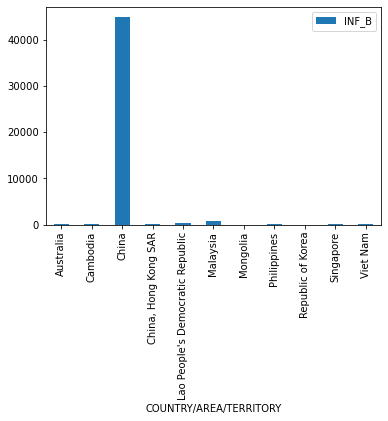

In [232]:
# Group the data by country and sum the values of INF_B
df8_sum = df1.groupby('COUNTRY/AREA/TERRITORY')['INF_B'].sum()
df8_sum

# Convert pandas core series to pandas dataframe
df08 = df8_sum.to_frame()

# Drop rows where INF_B has a value of 0
df08.drop(df08[df08['INF_B'] == 0].index, inplace=True)
df08.plot(kind='bar');

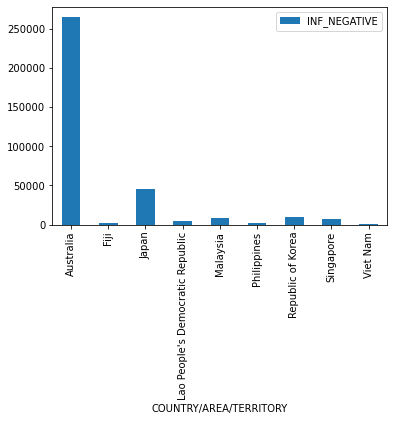

In [233]:
# Group the data by country and sum the values of INF_NEGATIVE
df9_sum = df1.groupby('COUNTRY/AREA/TERRITORY')['INF_NEGATIVE'].sum()
df9_sum

# Convert pandas core series to pandas dataframe
df09 = df9_sum.to_frame()

# Drop rows where INF_NEGATIVE has a value of 0
df09.drop(df09[df09['INF_NEGATIVE'] == 0].index, inplace=True)
df09.plot(kind='bar');

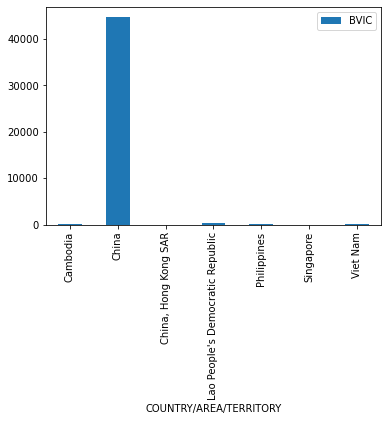

In [234]:
# Group the data by country and sum the values of BVIC
df10_sum = df1.groupby('COUNTRY/AREA/TERRITORY')['BVIC'].sum()
df10_sum

# Convert pandas core series to pandas dataframe
df10 = df10_sum.to_frame()

# Drop rows where BVIC has a value of 0
df10.drop(df10[df10['BVIC'] == 0].index, inplace=True)
df10.plot(kind='bar');

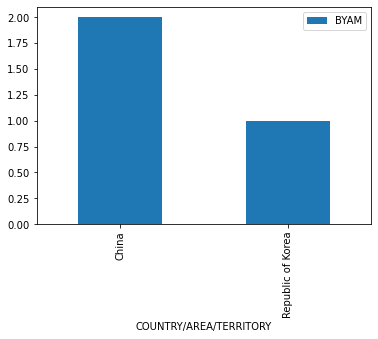

In [235]:
# Group the data by country and sum the values of BYAM
df11_sum = df1.groupby('COUNTRY/AREA/TERRITORY')['BYAM'].sum()
df11_sum

# Convert pandas core series to pandas dataframe
df11 = df11_sum.to_frame()

# Drop rows where BYAM has a value of 0
df11.drop(df11[df11['BYAM'] == 0].index, inplace=True)
df11.plot(kind='bar');

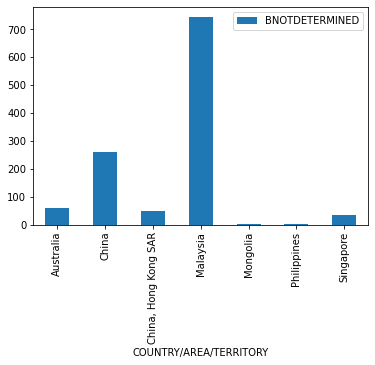

In [236]:
# Group the data by country and sum the values of BNOTDETERMINED
df12_sum = df1.groupby('COUNTRY/AREA/TERRITORY')['BNOTDETERMINED'].sum()
df12_sum

# Convert pandas core series to pandas dataframe
df12 = df12_sum.to_frame()

# Drop rows where BNOTDETERMINED has a value of 0
df12.drop(df12[df12['BNOTDETERMINED'] == 0].index, inplace=True)
df12.plot(kind='bar');

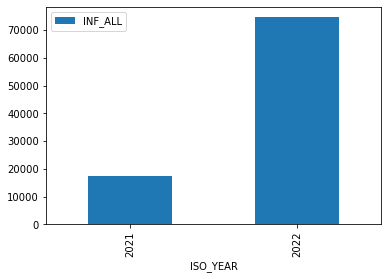

In [237]:
# Group the data by year and sum the values of all influenza cases
df13_sum = df1.groupby('ISO_YEAR')['INF_ALL'].sum()
df13_sum

# Convert pandas core series to pandas dataframe
df13 = df13_sum.to_frame()

# Drop rows where INF_ALL has a value of 0
df13.drop(df13[df13['INF_ALL'] == 0].index, inplace=True)
df13.plot(kind='bar');